# Линейная регрессия, интерполяция с положительными данными

### Библиотеки:

In [62]:
import datetime
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy import exp,sqrt
from scipy.stats import norm
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from datetime import datetime


### Данные с пропусками

In [85]:
data=pd.read_csv('C:/pythonushka/my_new_file999.csv')
print(data)
dfo = data
#data['date'] = pd.to_datetime(data['date'])
data['date'] = data.index
print(data.info())

            date       value
0     2018-01-01     327.643
1     2018-01-02         NaN
2     2018-01-03         NaN
3     2018-01-04         NaN
4     2018-01-05         NaN
...          ...         ...
1456  2021-12-27         NaN
1457  2021-12-28         NaN
1458  2021-12-29         NaN
1459  2021-12-30         NaN
1460  2021-12-31  726452.659

[1461 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1461 non-null   int64  
 1   value   1098 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 23.0 KB
None


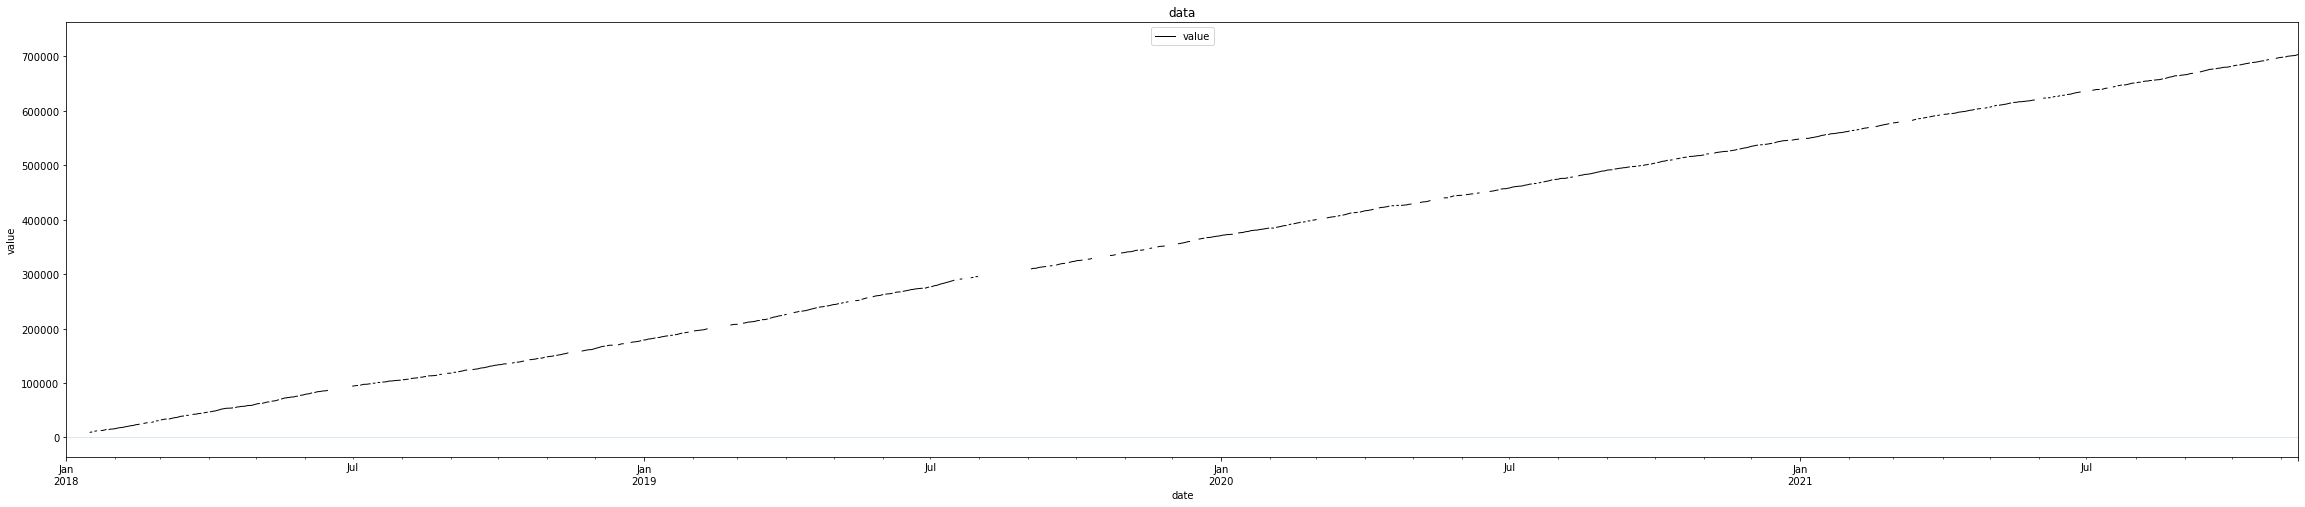

In [86]:
url = 'C:/pythonushka/my_new_file999.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show()

<AxesSubplot:xlabel='date'>

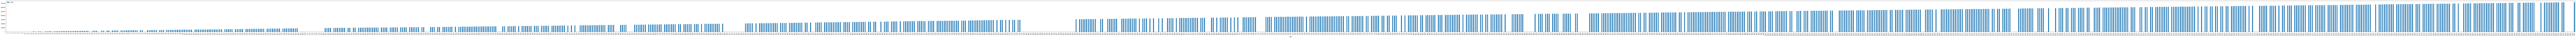

In [87]:
data.plot.bar(x='date', y='value', figsize=(400,5))

### Интерполяция

In [92]:
#      Настройка 
N = len(data)
x = np.array(range(N))

to_timestamp_fct = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()    
#data['date'] = data['date'].apply(to_timestamp_fct)

test_data = data[data['value'].isnull()]
#print(test_data)
train_data = data.dropna(inplace=False)
#print(train_data)

X_train = train_data.drop("value", axis=1)
#print(X_train)
y_train = train_data['value']
#print(y_train)




In [93]:
#         Обучение


lr = LinearRegression()
lr.fit(X_train, y_train)

X_test = test_data.drop("value", axis=1)
#print(X_test)
y_test = test_data['value'] 
#print(y_test)

y_pred = lr.predict(X_test)
test_data.loc[test_data.value.isnull(), 'value'] = y_pred 
#print(test_data)
#print(train_data)
df = [train_data, test_data]
df = pd.concat(df, sort=False)
df = df.sort_index(ascending=True)
#data['date'] = date
print(df)

      date          value
0        0     327.643000
1        1    2237.035366
2        2    2736.030915
3        3    3235.026464
4        4    3734.022013
...    ...            ...
1456  1456  728275.559280
1457  1457  728774.554829
1458  1458  729273.550378
1459  1459  729772.545927
1460  1460  726452.659000

[1461 rows x 2 columns]


C:\Python\Anaconda3.8\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:title={'center':'value'}>

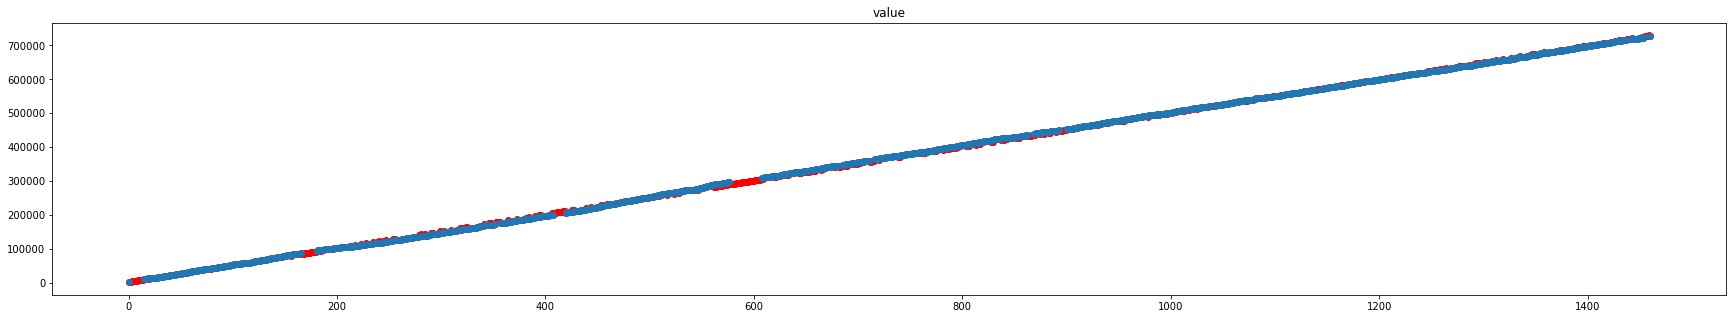

In [94]:
df['value'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
data['value'].plot(title='value', marker='o', figsize=(30, 5))

In [95]:

data=pd.read_csv('C:/pythonushka/my_new_file999.csv')

df = [train_data, test_data]
df = pd.concat(df, sort=False)
df = df.sort_index(ascending=True)
#data['date'] = date

length_colulmn = len(df)

for i in range(1, length_colulmn):
    if df['value'].iloc[i]>df['value'].iloc[1460]:
        df['value'].iloc[i] = df['value'].iloc[1460]
#    elif df['value'].iloc[i]>df['value'].iloc[i+1] <0:
#        df['value'].iloc[i] = df['value'].iloc[i+1]
    elif df['value'].iloc[i-1]>df['value'].iloc[i]:
        df['value'].iloc[i] = df['value'].iloc[i-1]
    else: 
        df['value'].iloc[i] = df['value'].iloc[i]
#print(df)




C:\Python\Anaconda3.8\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


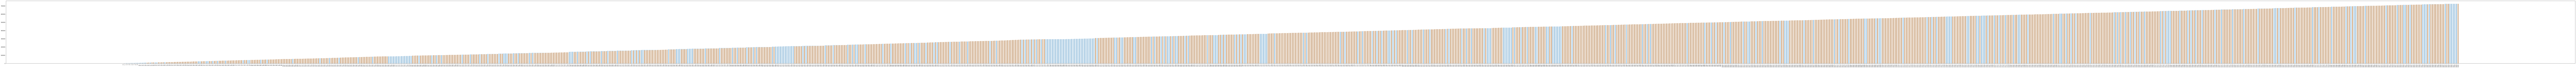

In [76]:

w=0.5
x = df['date']
value = df['value']
value2 = data['value']

plt.bar(x, value, w, alpha=0.5)
plt.bar(x, value2, w, alpha=0.5)

plt.gcf().set_size_inches(400, 10)
plt.xticks(x, rotation = 90)
plt.show()

In [96]:
df['delta'] = df['value'].T.diff().fillna(0).astype('float64')  
#print(df['delta'])

# Функция покажет если есть предыдущие значения больше последующих

data_delta_age_negative = df[df['delta'] <0]
print(data_delta_age_negative)
#df.pop('date')
#df.pop('value')
#df.pop('delta')
#data['index'] = data.index +1
#data['index2'] = data.index +1

Empty DataFrame
Columns: [date, value, delta]
Index: []


C:\Python\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


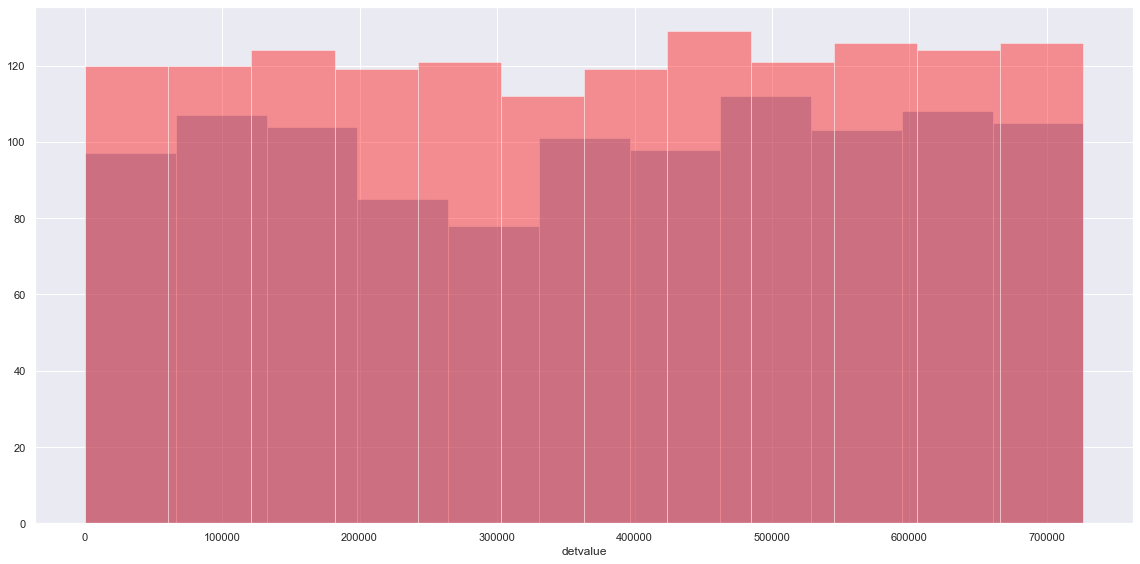

In [135]:
df['detvalue'] = df.value
sns.set()
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16, 8)
sns.distplot(data["value"].dropna(), kde = False)
sns.distplot(df['detvalue'], kde = False, color = 'red')
    
plt.tight_layout()

In [131]:
pd.concat([data[["value"]], df[["detvalue"]]], axis = 1).describe().T

count           mean            std      min            25%  \
value     1098.0  371111.087540  211556.511905  327.643  178117.507750   
detvalue  1461.0  366711.437473  210405.341008  327.643  183372.419682   

                 50%         75%         max  
value     382471.042  552185.109  726452.659  
detvalue  370970.549  548177.664  726452.659

In [ ]:
print(data["value"].std() - df["detvalue"].std())

# 1151.1708971241314


# Стандартная ошибка (std)  хорошая


Мы можем представить себе этот факт разными способами. 
Первый - это построение гистограмм как для неполных, так и для полных данных, 
на которых мы можем заметить, что график полных данных выше и уже по сравнению с графиком неполных данных. 
Другими словами, полные данные имеют меньшее стандартное отклонение (следовательно, меньшую изменчивость), 
чем неполные данные. Другой метод - построить коробчатую диаграмму, 
на которой мы можем наблюдать, что диапазон IQ довольно сжат для полных данных по сравнению с таковым в неполных данных.

# ВЫВОДЫ:
Модель может подойти для данных и небольшими пропусками, чем больше промежутки, тем хуже она будет работать, также модель нуждается в фильтрации значений превышающих норму(это значения превышающие последующие). 